In [5]:
'''#------IMPORTAR DATASET DEL PIB DE LOS PAISES'''
with open('PIB_MUNDIAL.txt', 'r') as file:
    lines = file.readlines()

data = []
nombrepaises = []

for line in lines:
    elements = line.strip().split(',')
    #ELIMINAR EL CODIGO DE LOS PAISES
    elements.pop(1)
    
    data.append(elements)
    nombrepais = elements[0]
    nombrepaises.append(nombrepais)

#agregar una lista de nombre pais y pib 2029
PIB_NUMERO = []
MEDIA_PIB = []
for pais in data:
    if pais[29] != "?":
        columna = [pais[0], pais[29]]
        columna2 = pais[29]
    if pais[29] == "?":
        #bucle para buscar valor no ? en años anteriores
        for i in range(28):
            numero = 28
            if pais[numero] != "?":
                columna = [pais[0], pais[numero]]
                columna2 = pais[numero]
                break
            if pais[numero] == "?":
                numero -= 1
                
    MEDIA_PIB.append(columna)  #lista con el nombre ciudad y pib
    PIB_NUMERO.append(columna2) #lista con solo el numero de pib
#print(MEDIA_PIB)

#agrupar manualmente, "ya que solo tenemos un conjunto de datos"


In [98]:
'''#--------IMPORTAR EL DATASET DE CONTAMINACION DE LOS PAISES "KAGGLE"'''
with open('contaminacion_mundial.txt', 'r') as file:
    lines = file.readlines()
    
data2 = []
transformacion = []
paises_contaminacion = []
solo_paises = []
for line in lines:
    elements = line.strip().split(',') #ejecutar elementos
    
    cadena_nombre = [elements[0], elements[1]]
    paises_contaminacion.append(cadena_nombre) #guardar los nombres de los paises con la ciudad
    solo_paises.append(elements[0])

    #ELIMINAR LA CIUDAD Y EL NOMBRE DE LOS PAISES
    elements.pop(0)
    elements.pop(0)
    data2.append(tuple(elements))  #hacer data2 una tupla
    #cambiar los valroes good other por numeros
    #good = 1
    #moderate = 0
    #other = 3 "peligrosos, insaludable..."
    for i in range(1, len(elements), 2):  # Iterar sobre los elementos que representan la calidad del aire
        if elements[i] == "Good":
            elements[i] = 1
        elif elements[i] == "Moderate":
            elements[i] = 0
        else:
            elements[i] = 3 
    transformacion.append(elements)

print(transformacion) #imprimir dataset transformado, good = 1 moderate = 0 otros = 3

#convertir lista a array de numpy
import numpy as np
X_contaminacion = np.array(transformacion)
print(paises_contaminacion)

[['51', 0, '1', 1, '36', 1, '0', 1, '51', 0], ['41', 1, '1', 1, '5', 1, '1', 1, '41', 1], ['66', 0, '1', 1, '39', 1, '2', 1, '66', 0], ['34', 1, '1', 1, '34', 1, '0', 1, '20', 1], ['22', 1, '0', 1, '22', 1, '0', 1, '6', 1], ['54', 0, '1', 1, '14', 1, '11', 1, '54', 0], ['62', 0, '1', 1, '35', 1, '3', 1, '62', 0], ['64', 0, '1', 1, '29', 1, '7', 1, '64', 0], ['54', 0, '1', 1, '41', 1, '1', 1, '54', 0], ['142', 3, '3', 1, '89', 0, '9', 1, '142', 3], ['68', 0, '2', 1, '68', 0, '1', 1, '58', 0], ['41', 1, '1', 1, '24', 1, '6', 1, '41', 1], ['158', 3, '3', 1, '139', 3, '1', 1, '158', 3], ['158', 3, '1', 1, '50', 1, '1', 1, '158', 3], ['83', 0, '1', 1, '46', 1, '0', 1, '83', 0], ['59', 0, '1', 1, '30', 1, '4', 1, '59', 0], ['154', 3, '3', 1, '100', 3, '2', 1, '154', 3], ['55', 0, '1', 1, '47', 1, '0', 1, '55', 0], ['72', 0, '1', 1, '4', 1, '23', 1, '72', 0], ['161', 3, '2', 1, '71', 0, '0', 1, '161', 3], ['28', 1, '1', 1, '28', 1, '2', 1, '28', 1], ['118', 3, '2', 1, '30', 1, '2', 1, '118', 

In [ ]:
'''AHORA QUE TENEMOS EL DATASET DEL PIB Y DE LA CONTAMINACION, HAREMOS ESTOS PASOS:
#1.DIVIDIR LOS PAISES EN NIVELES DE CONTAMINACION "CLASSIFICARLOS"
#2.CON REGRESION LINEAL SIMPLE Y LA CLASSIFICACION ANTERIOR DETECTAREMOS 
#EL TIPO DE NIVEL DE CONTAMINACION SEGUN EL PIB DE UNA CIUDAD
'''

In [ ]:
'''#1 ---------CLASSIFICAR LAS CIUDADES SEGUN LA CONTAMINACION CON K-MEANS'''


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

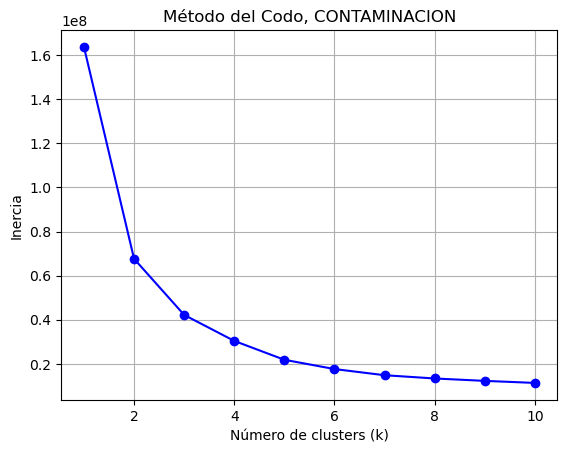

El numero de clusteres es 3, como podemos ver en la grafica 


In [40]:
#1.1. HACER LA TECNICA DEL CODO PARA DETECTAR CLUSTERS
from sklearn.cluster import KMeans
n_clusters = range(1, 11)  
n_iter = 100
tol = 1e-3
inertia = []

# Itera sobre el nº de clústeres
for n_c in n_clusters:
    kmeans = KMeans(n_clusters=n_c, random_state=0) 
    kmeans.fit(X_contaminacion)
    inertia.append(kmeans.inertia_)

#mostrar en una grafica el codo
import matplotlib.pyplot as plt
# Graficar la curva del codo
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo, CONTAMINACION')
plt.grid(True)
plt.show()

print("El numero de clusteres es 3, como podemos ver en la grafica ")
n_clusters = 3



In [48]:
#REORDENAR LOS DATOS ALEATORIAMENTE SI ES NECESSARIO
np.random.seed(42)  
indices = np.arange(len(X_contaminacion))
np.random.shuffle(indices)
X = X_contaminacion[indices]

#DIVIDIR EN ENTRENAMINETO Y TEST
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X_normalized, test_size=0.2, random_state=42)

#NORMALIZAR
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

#CALCULAR K-MEANS
n_iter = 100
tol = 1e-3

#1.2. AVERIGUAR LOS CENTROIDES PARA REALIZAR K-MEANS
import numpy as np
#X_contaminacion = X_contaminacion.astype(float)
#centroides = centroides.astype(float)

def dist_examples(x, centroide):
    dist = np.linalg.norm(x - centroide)
    return dist #distancia entre los grupos de los centroides


inicializaciones = 10
resultados = []
guardar_centroides = []       #lista para guardar todos los centroides
#inicializar cada modelo "inicializacion"
for inicializacion in range(inicializaciones):
#hacer centroides aleatorios
    np.random.shuffle(X_train)
    centroides = X_train[:n_clusters, :]
#CALCULAR CENTROIDES MAS APTOS
    guardar_centroides.append(centroides)
for i in range(n_iter):
        cluster_asignado_ejemplos = np.zeros(len(X_train), dtype=int)

        for i, x in enumerate(X_train):
                distancias = [dist_examples(x, c) for c in centroides]
                cluster_asignado_ejemplos[i] = np.argmin(distancias)

        for c in range(n_clusters):
                puntos_cluster = X_train[cluster_asignado_ejemplos == c]
                centroides[c] = np.mean(puntos_cluster, axis=0)

        if np.all(np.abs(centroides - np.mean(X_train, axis=0)) < tol):
                #print('Inicialización', inicializacion, '- Modelo converge en iteración nº:', i)
                break
        else:
                #print('Inicialización', inicializacion, '- Nº máx. de iteraciones alcanzado')
                resultados.append((centroides, cluster_asignado_ejemplos))

           
#GRAFICA PARA VER LOS CENTROIDES MAS APTOS
#MOSTRAR UNA GRAFICA PARA VER LOS CENTROIDES CON SU NUMERO

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=cluster_asignado_ejemplos, cmap='viridis', s=50, alpha=0.5, label='Datos')
for i, centroid in enumerate(centroides):
    plt.scatter(centroid[0], centroid[1], c='red', s=200, marker='X')
    plt.text(centroid[0], centroid[1], str(i), color='black', fontsize=12, ha='center', va='center')
plt.title('Clusters obtenidos con K-means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


In [106]:
#MOSTRAR LAS CIUDADES SEGUN SU GRUPO
#guardar el nombre del pais con su grupo en una lista
paisygrupo = [] #lista en la que guardar nombre y grupo

print("aqui veriamos cada pais con su grupo")
grupo_pais = []

for i, x in enumerate(X_train):
    distancias = [dist_examples(x, c) for c in centroides]
    cluster_asignado_ejemplos[i] = np.argmin(distancias)
    
    #sacar nombre
    nombre_pais = paises_contaminacion[i][0]
    #sacar ciudad
    ciudad = paises_contaminacion[i][1]
    #guardar el grupo
    grupo = np.argmin(distancias)

    paisygrupo.append([nombre_pais, ciudad, grupo])#guardar nombre ciudad y grupo a la lista

    #columna = [paises_contaminacion[i], np.argmin(distancias)] #guardar nombre y grupo 
    #paisygrupo.append(columna) 
#print(paisygrupo)
print("imprimir paises y ciudades por los grupos:")

for pais in paisygrupo:
    if pais[2] == 0:
        print(pais[0], pais[1], "grupo 0")
for pais in paisygrupo:
    if pais[2] == 1:
        print(pais[0], pais[1], "grupo 1")
for pais in paisygrupo:
    if pais[2] == 2:
        print(pais[0], pais[1], "grupo 2")


aqui veriamos cada pais con su grupo
imprimir paises y ciudades por los grupos:
Russian Federation Praskoveya grupo 0
United States of America Punta Gorda grupo 0
Germany Puttlingen grupo 0
Belgium Puurs grupo 0
Russian Federation Pyatigorsk grupo 0
Netherlands Raalte grupo 0
Pakistan Radhan grupo 0
Republic of North Macedonia Radovis grupo 0
France Raismes grupo 0
India Rajgir grupo 0
India Phulabani grupo 0
Poland Piaseczno grupo 0
Brazil Pindobacu grupo 0
India Piravam grupo 0
France Pontarlier grupo 0
Brazil Porecatu grupo 0
Finland Pori grupo 0
South Africa Port Elizabeth grupo 0
United States of America Port Neches grupo 0
United Kingdom of Great Britain and Northern Ireland Port Talbot grupo 0
United States of America Post Falls grupo 0
United Republic of Tanzania Dar Es Salaam grupo 0
India Darbhanga grupo 0
Haiti Delmas grupo 0
United States of America Deming grupo 0
United Kingdom of Great Britain and Northern Ireland Denton grupo 0
Somalia Dinsor grupo 0
United States of Ame

In [ ]:
#Ver todos los paises para escojer uno y mostrarlo en el mapa...
conjunto_sin_repetidos = set(solo_paises)
paises_sin_repetidos = list(conjunto_sin_repetidos)
print("Escoje un pais e introduce el nombre abajo del todo:")

for pais in paises_sin_repetidos:
    print(pais)

pais_pedido = input()

print("el pais pedido es:", pais_pedido)

In [89]:
pip install folium

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [91]:
pip install folium --upgrade

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [118]:
#MOSTRAR EL MAPA DE EL PAIS SELECCIONADO "pais_pedido" Aveces tarda, paralo y vuelvelo a provar
print("EL MAPA TARDA EN CARGARSE!!!, MEJOR COJE UN PAIS PEQUEÑO...")
print("AL TARDAR TANTO HE DESCARGADO TODAS LAS CORDENADAS EN UN DATASET NUEVO")
#1.mostrar las cordenadas del pais:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="my_geocoder")
location = geolocator.geocode(pais_pedido)
if location:
    print("latitud: ", location.latitude, "longitud:", location.longitude)
else:
    print(f"No se encontró la ubicación de el pais {pais_pedido}")


#MBUSCAR LAS CIUDADES DE ESE PAIS Y GUARDARLAS EN UNA LISTA

lista_ciudades = []
lista_grupo = []
print("ciudades:")
for pais in paisygrupo:
    if pais[0] == pais_pedido:
        print(pais[1])
        lista_ciudades.append(pais[1])
        lista_grupo.append(pais[2])

#AGREGAR LA IMAGEN DEL MAPA DEL PAIS
import os
import folium
from IPython.display import IFrame

m = folium.Map(location=[location.latitude, location.longitude], zoom_start=4)

#AGREGAR A LA IMAGEN LAS CIUDADES CON SU COLOR
for i in range(len(lista_ciudades)):
#for ciudad in lista_ciudades:
    #AVERIGUAR LA LOCALIZACION DE LA CIUDAD
    geolocator = Nominatim(user_agent="my_geocoder")
    nombreciudad = pais_pedido, lista_ciudades[i]
    location = geolocator.geocode(nombreciudad)
    if location:
        #MOSTRAR LAS ZONAS EVALUADAS CON DIFERENTES COLORES, mostrar las diferentes ciudades...
        #GRUPO 0 = VERDE
        #GRUPO 1 = AZUL
        #GRUPO 2 = ROJO

        if lista_grupo[i] == 0:
            folium.Marker(location=[location.latitude, location.longitude], popup='map', icon=folium.Icon(color='red')).add_to(m)
        if lista_grupo[i] == 1:
            folium.Marker(location=[location.latitude, location.longitude], popup='map', icon=folium.Icon(color='blue')).add_to(m)
        if lista_grupo[i] == 2:
            folium.Marker(location=[location.latitude, location.longitude], popup='map', icon=folium.Icon(color='green')).add_to(m)

    else:
        print("no hay cordenadas de la ciudad: ", nombreciudad)


#MOSTRAR LAS ZONAS EVALUADAS CON DIFERENTES COLORES, mostrar las diferentes ciudades...
#GRUPO 0 = VERDE
#GRUPO 1 = AZUL
#GRUPO 2 = ROJO

m.save('mapa.html')

IFrame(src='mapa.html', width=700, height=600)




EL MAPA TARDA EN CARGARSE!!!, MEJOR COJE UN PAIS PEQUEÑO...
AL TARDAR TANTO HE DESCARGADO TODAS LAS CORDENADAS EN UN DATASET NUEVO
latitud:  39.3260685 longitud: -4.8379791
ciudades:
Abaran
Almoradi
Culleredo
Puertollano
Godella
Gava
Inca
Jaen
La Carolina
La Garriga
La Llagosta
Murcia
Maracena
El Prat De Llobregat
Elgoibar
Ermua
Estepa
Mieres
Los Barrios
Rincon De La Victoria
Moncada
Daimiel
Callosa De Segura
Carmona
Aguilas
Requena
Pinto
Almansa
Andoain
Villaviciosa
Baena
Caceres
Soller
Utiel
Sanlucar La Mayor
Jodar
Sopelana
Soria
Guia De Isora
Brenes
Cambre
Benicarlo
Ibi
Palamos
Zarautz
San Lorenzo De El Escorial
Santander
Tolosa
Manises
Huercal Overa
Granollers
Mairena Del Alcor
Viladecans
Villafranca De Los Barros
Villarrobledo
Arrecife
Aviles
Vilanova Del Cami
Albolote
Alora
Balaguer
Castelldefels
Navalmoral De La Mata
Alcala La Real
Torremolinos
El Ejido
El Vendrell
Sueca
Ripoll
Palma
Eibar
El Puerto De Santa Maria
Alcala De Henares
Alcaniz
Alcantarilla
Alcorcon
La Algaba
Baza
Bu

In [84]:
#DESCARGARE UNA LIBRERIA PARA LOCALIZAR LAS ZONAS EN CORDENADAS...
#ESTA SE LLAMA GEOPY:
#https://mappinggis.com/2018/11/geocodificacion-con-geopy/

#INSTALAR GEOPY!!!

In [68]:
pip install geopy

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e5/15/cf2a69ade4b194aa524ac75112d5caac37414b20a3a03e6865dfe0bd1539/geopy-2.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for geographiclib<3,>=1.52 from https://files.pythonhosted.org/packages/9f/5a/a26132406f1f40cf51ea349a5f11b0a46cec02a2031ff82e391c2537247a/geographiclib-2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   ----------------------------- ---------- 92.2/125.4 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 125.4/125.4 kB 1.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
   ---------------------------------------- 40.3/40.3 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [74]:
from geopy.geocoders import Nominatim
print("se que tarda, pero es necessario para verlos en el mapa. no hace falta descargarlo, mira la foto, con los colores classificados")
#CON GEOPY CREAREMOS UNA LISTA CON 3 FILAS = CORDENADA1, CORDENADA2, GRUPO CONTAMINACION
cordenadas_contaminacion = []

for pais in paisygrupo:
    #saver la localizacion de el pais
    
    geolocator = Nominatim(user_agent="my_geocoder")
    location = geolocator.geocode(pais[0])
    if location:
        cordenadas_contaminacion.append((pais[0], location.latitude, location.longitude, pais[1]))
    else:
        print(f"No se encontró la ubicación para {pais[0]}")
        
    #cordenadas_contaminacion = pais[0], location.latitude, location.longitude, pais[1]  
    #nombre, latitud, longitud, grupo
    
    #print((location.latitude, location.longitude))
print(cordenadas_contaminacion)

No se encontró la ubicación para ('Russian Federation', '-', 'Praskoveya')
No se encontró la ubicación para ('Somalia', '-', 'Dinsor')
No se encontró la ubicación para ('Tunisia', '-', 'Tawzar')
No se encontró la ubicación para ('Iran (Islamic Republic of)', '-', 'Taybad')
No se encontró la ubicación para ('Tunisia', '-', 'Tinjah')
No se encontró la ubicación para ('United States of America', '-', 'West Carrollton City')
No se encontró la ubicación para ('Russian Federation', '-', 'Goryachevodskiy')
No se encontró la ubicación para ('Tunisia', '-', 'Taburbah')
No se encontró la ubicación para ('Iran (Islamic Republic of)', '-', 'Tafresh')
No se encontró la ubicación para ('India', '-', 'Yaval')
No se encontró la ubicación para ('Iran (Islamic Republic of)', '-', 'Astaneh Ye Ashrafiyeh')
No se encontró la ubicación para ('South Africa', '-', 'Ballitoville')
No se encontró la ubicación para ('India', '-', 'Chilakalurupet')
No se encontró la ubicación para ('Bolivia (Plurinational State o

No se encontró la ubicación para ('Bolivia (Plurinational State of)', '-', 'Ascension')
No se encontró la ubicación para ('Kazakhstan', '-', 'Zachagansk')
No se encontró la ubicación para ('Kazakhstan', '-', 'Zhetysay')
No se encontró la ubicación para ('Egypt', '-', 'Diyarb Najm')
No se encontró la ubicación para ('Russian Federation', '-', 'Ust Ordynskiy')
No se encontró la ubicación para ('Iran (Islamic Republic of)', '-', 'Torbat E Jam')
No se encontró la ubicación para ('Ukraine', '-', 'Starokostyantyniv')
No se encontró la ubicación para ('China', '-', 'Sanhsia')
No se encontró la ubicación para ('Iran (Islamic Republic of)', '-', 'Rasht')
No se encontró la ubicación para ('Venezuela (Bolivarian Republic of)', '-', 'Bachaquero')
No se encontró la ubicación para ('Kazakhstan', '-', 'Balykshi')
No se encontró la ubicación para ('Ukraine', '-', 'Basarabeasca')
No se encontró la ubicación para ('Pakistan', '-', 'Naushahro Firoz')
No se encontró la ubicación para ('India', '-', 'Nepa 

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Crear una figura y un eje utilizando Cartopy
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Agregar un mapa de fondo con límites mundiales
ax.set_global()
ax.stock_img()

# Mostrar el mapa
plt.show()